importing Jupyter notebook from model.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   34792 non-null  int64 
 1   sentiment  34792 non-null  object
 2   content    34792 non-null  object
dtypes: int64(1), object(2)
memory usage: 815.6+ KB
None


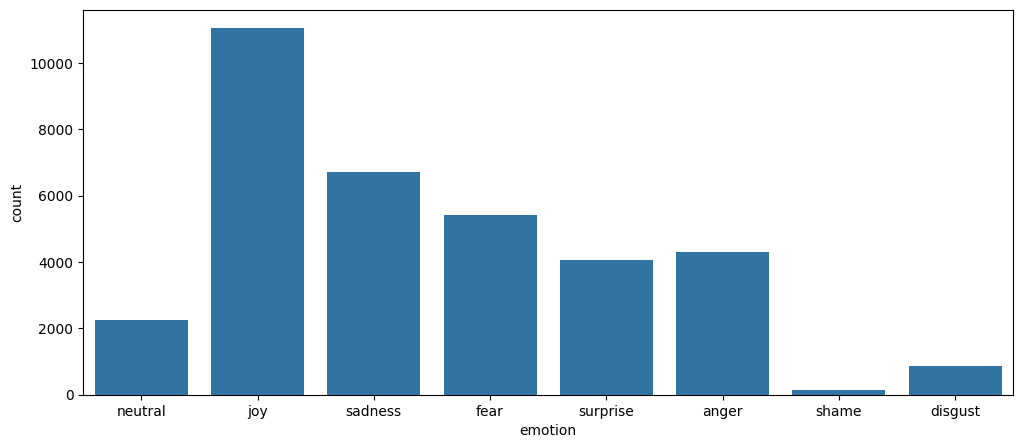

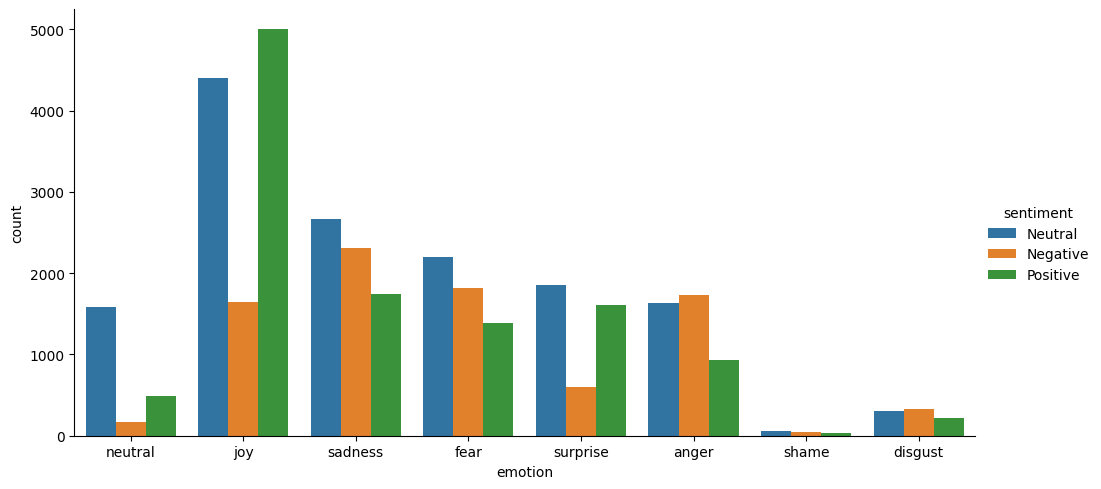

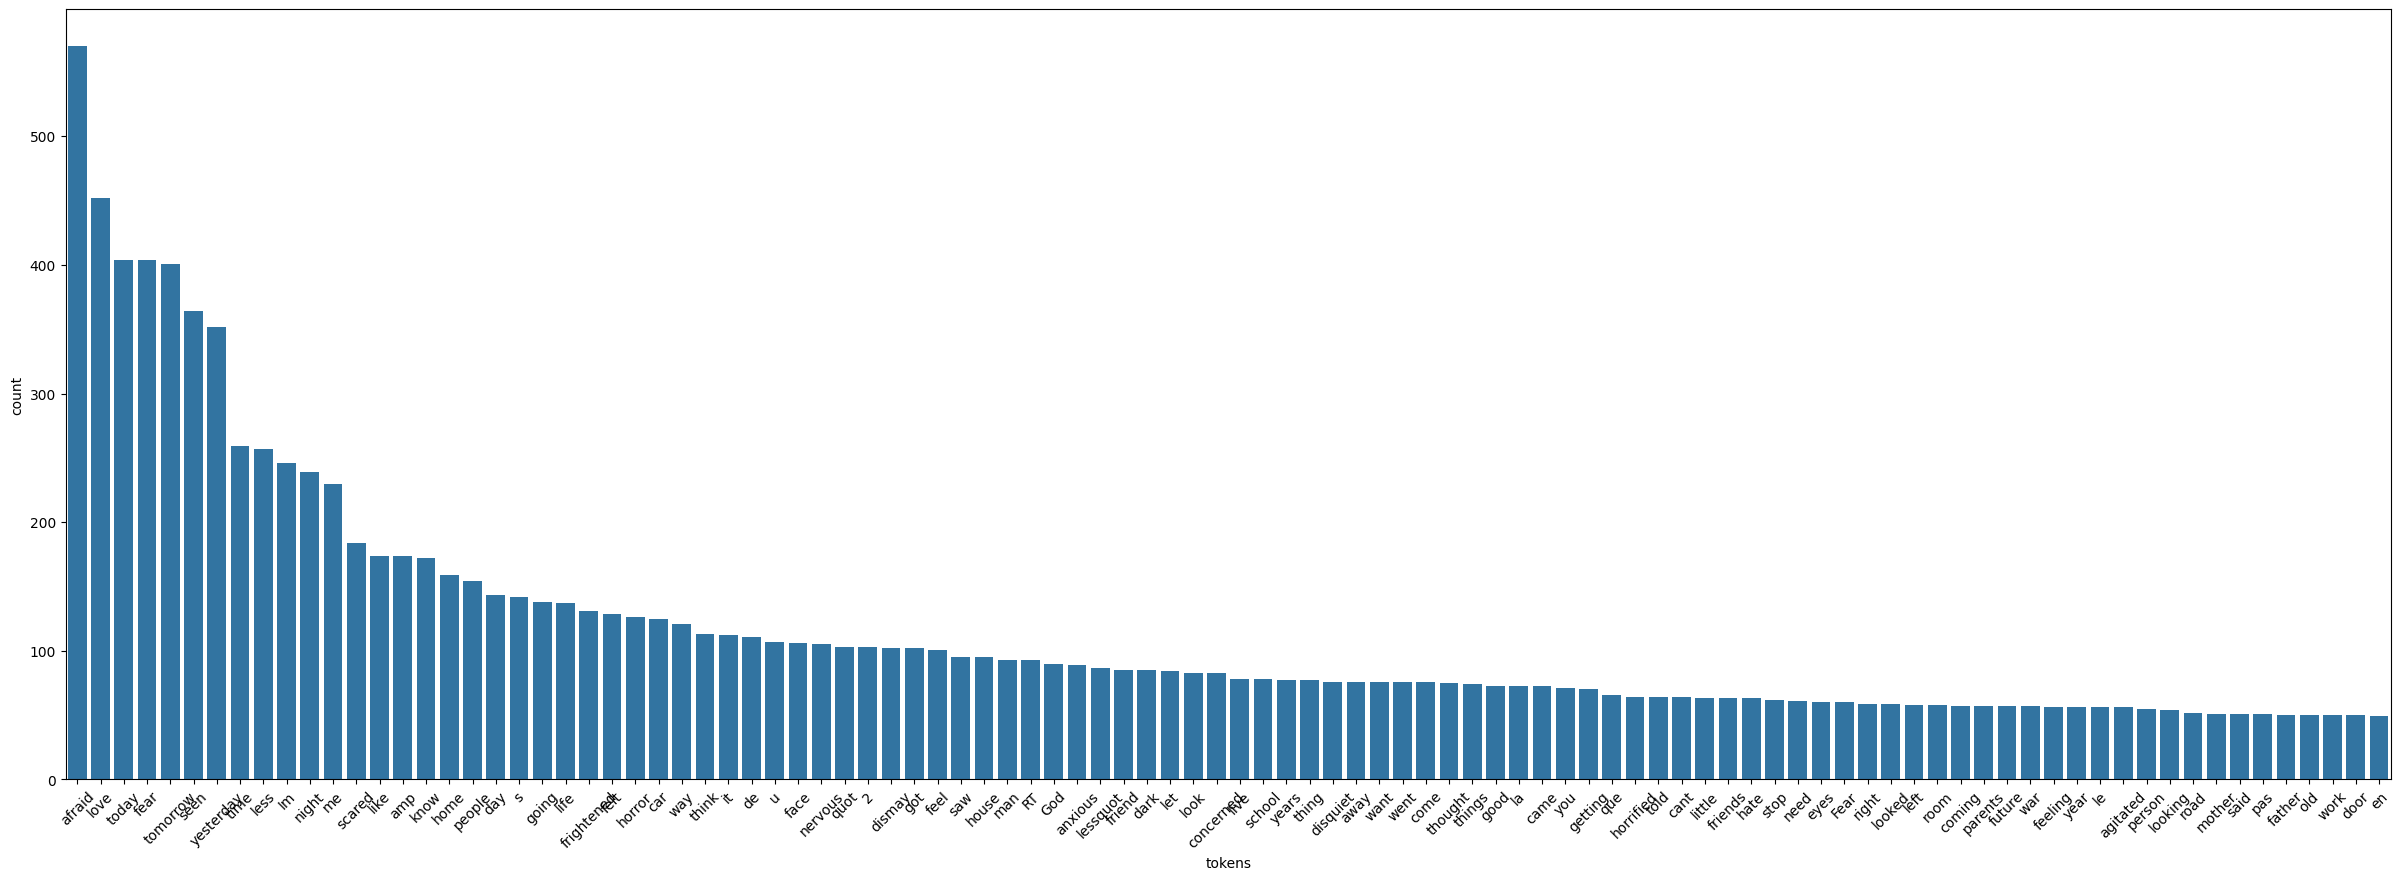

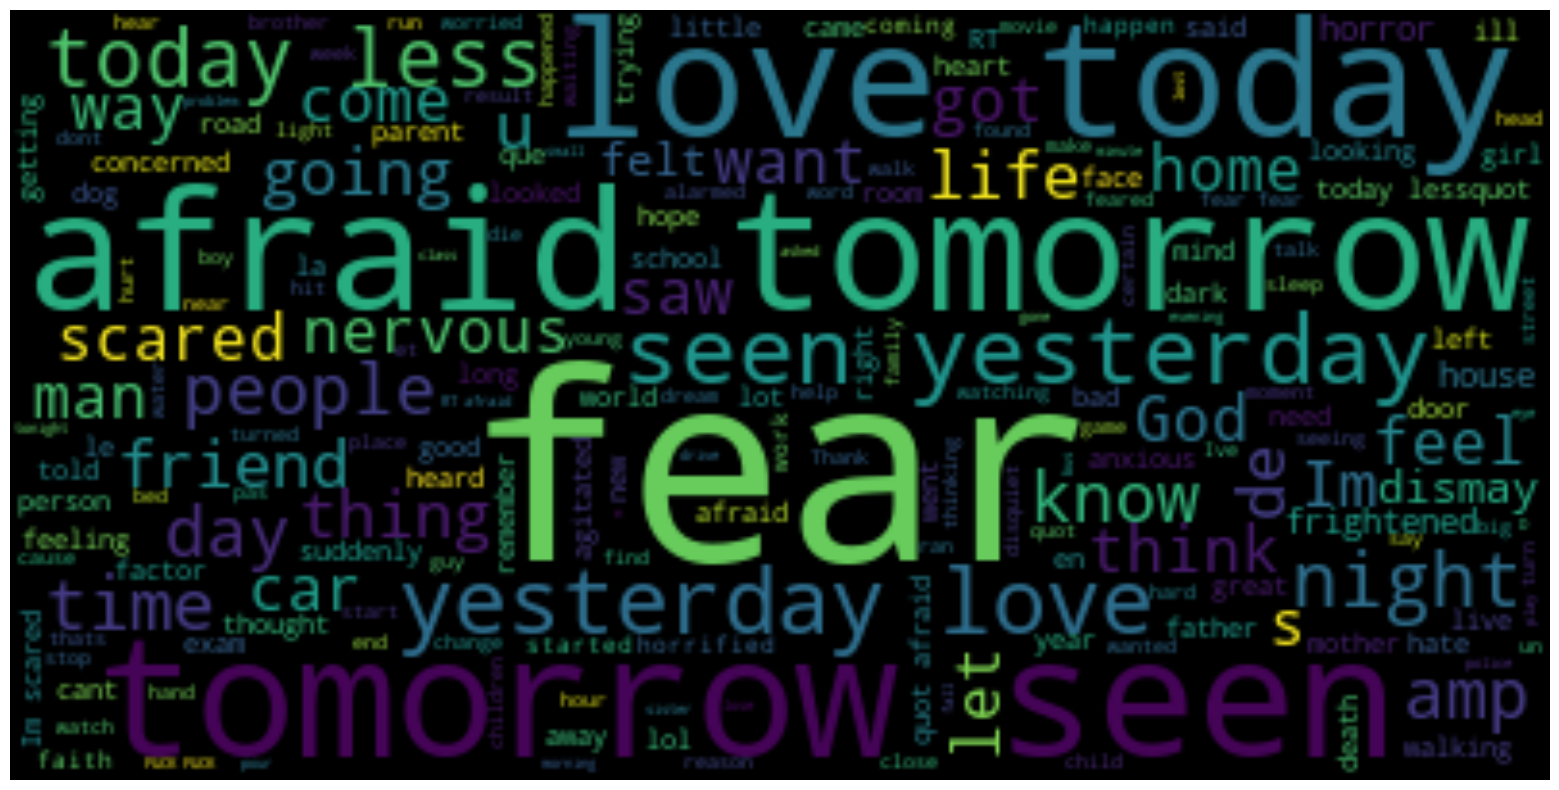

Epoch 1/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.3994 - loss: 1.5831 - val_accuracy: 0.6192 - val_loss: 1.1132
Epoch 2/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.7838 - loss: 0.6769 - val_accuracy: 0.6139 - val_loss: 1.1665
Epoch 3/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9373 - loss: 0.2204 - val_accuracy: 0.6101 - val_loss: 1.4205
Epoch 4/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9757 - loss: 0.0943 - val_accuracy: 0.5983 - val_loss: 1.6512
Epoch 5/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9846 - loss: 0.0559 - val_accuracy: 0.5935 - val_loss: 1.8612
Epoch 6/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9881 - loss: 0.0440 - val_accuracy: 0.5936 - val_loss: 2.0857
Epoch 7/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9902 - loss: 0.0372 - val_accuracy: 0.5891 - val_loss: 2.1916
Epoch 8/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9915 - loss: 0.0309 - 

In [1]:
#Importing model.ipynb
import import_ipynb 
import model
import song

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   34792 non-null  int64 
 1   sentiment  34792 non-null  object
 2   content    34792 non-null  object
dtypes: int64(1), object(2)
memory usage: 815.6+ KB
None


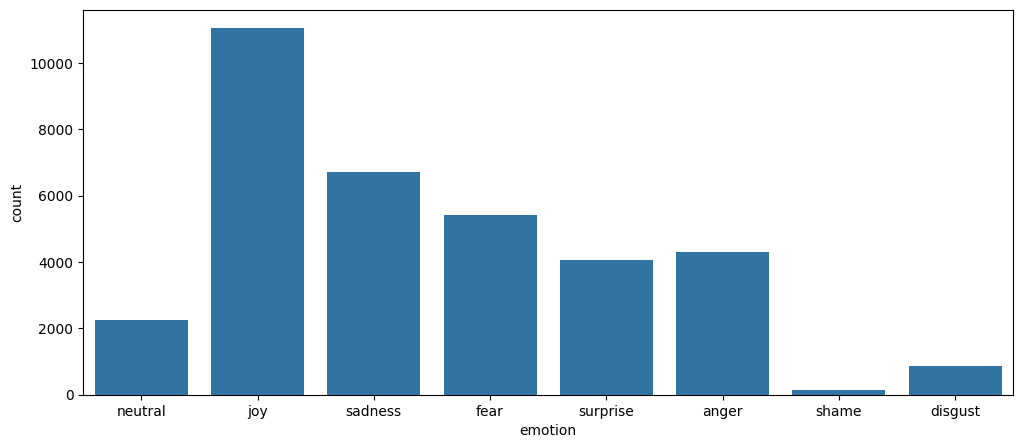

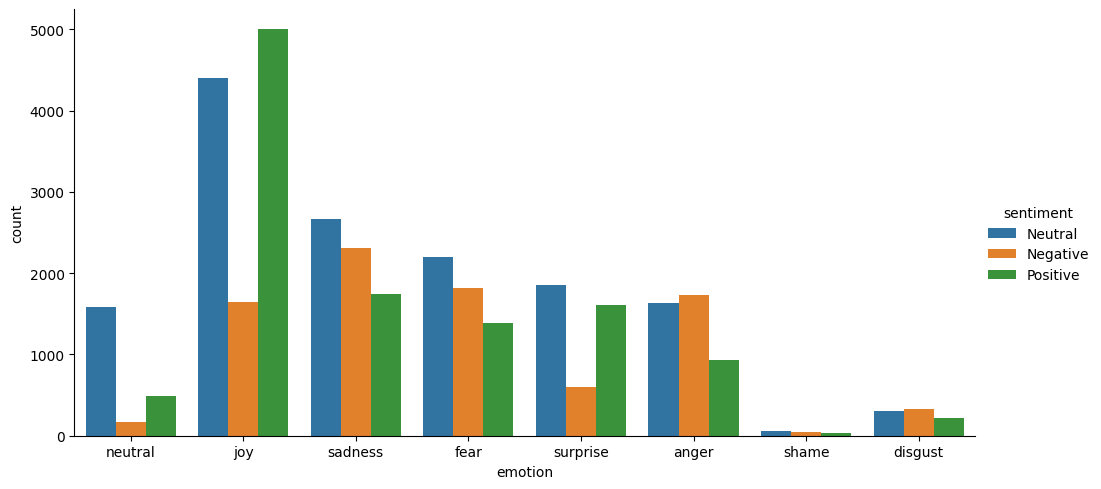

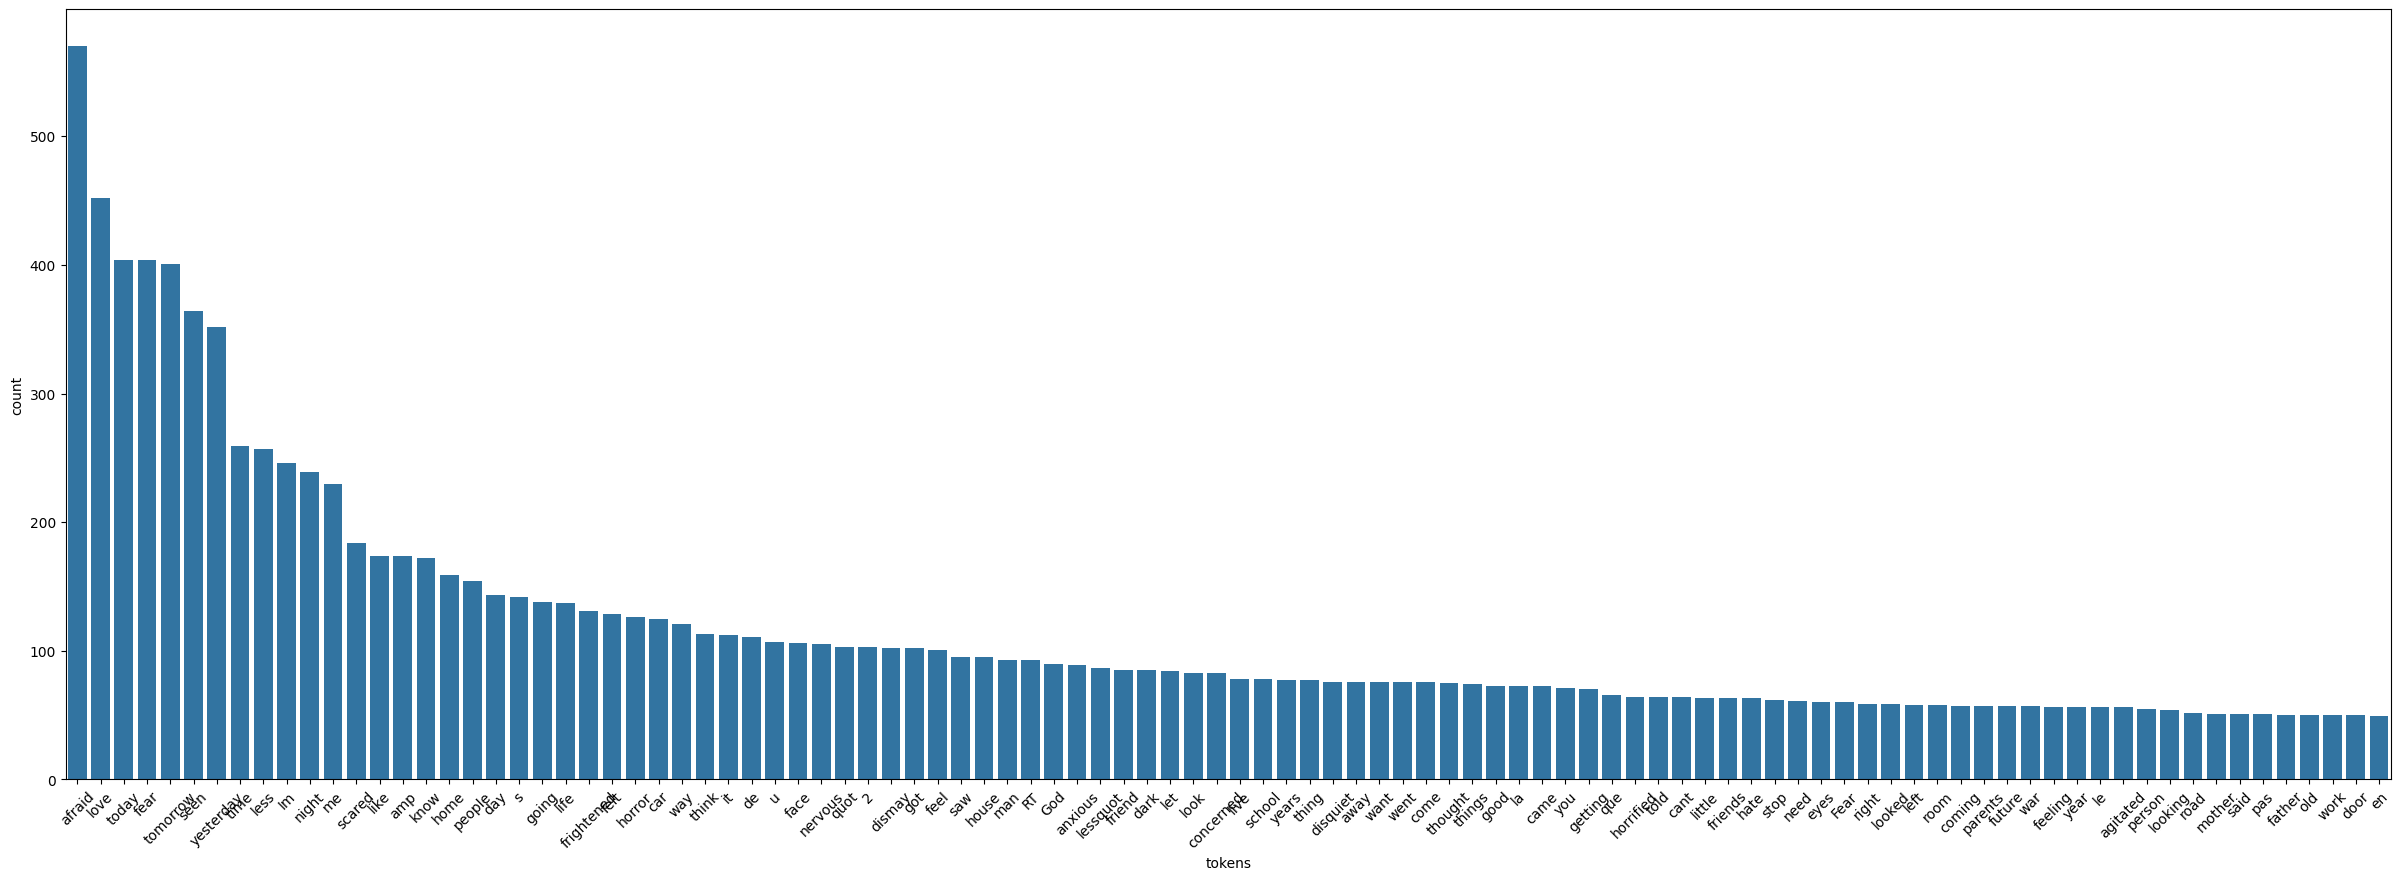

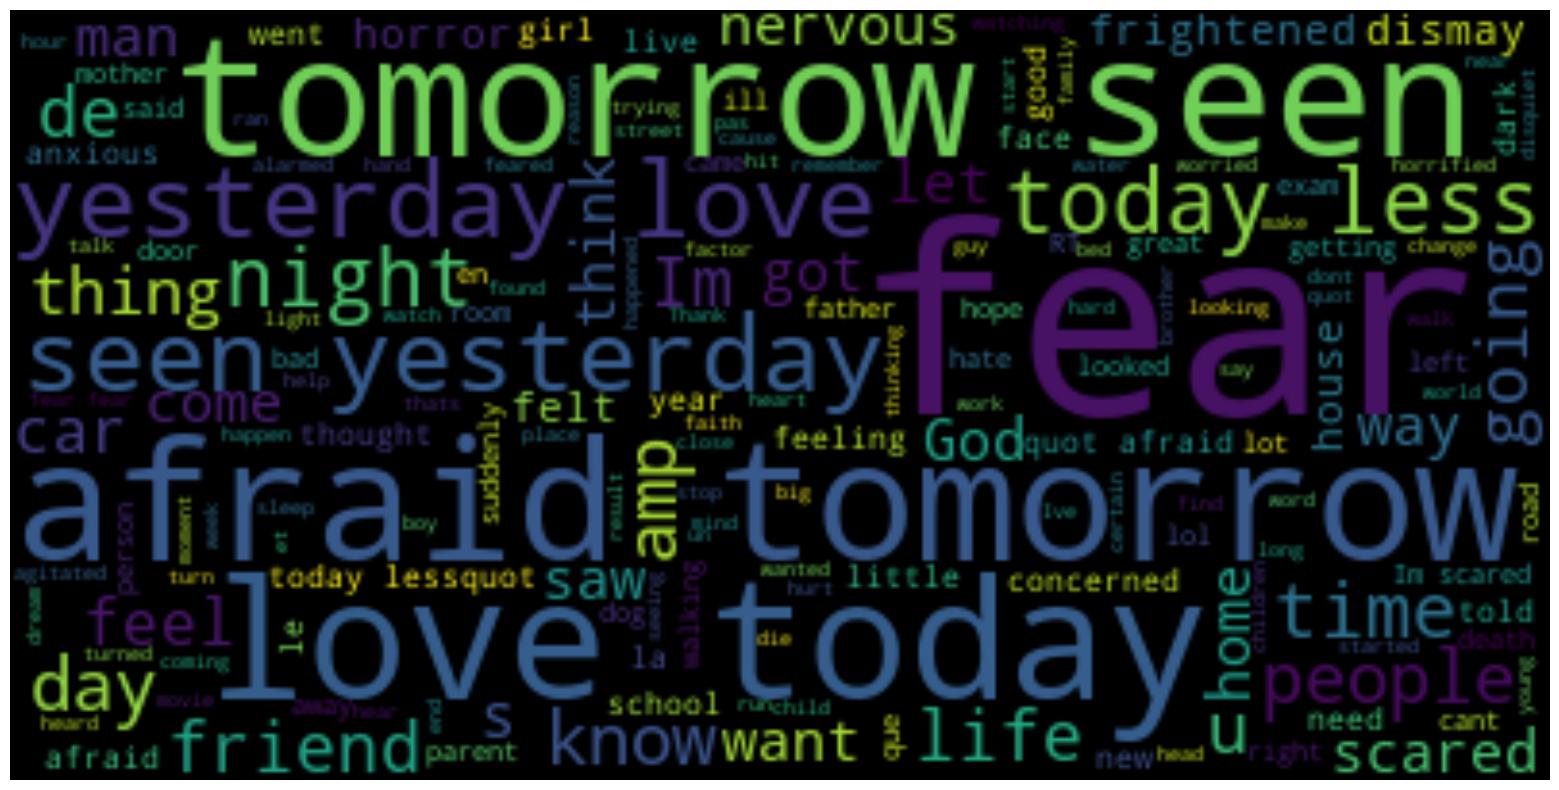

Epoch 1/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.4024 - loss: 1.5805 - val_accuracy: 0.6089 - val_loss: 1.1269
Epoch 2/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.7824 - loss: 0.6662 - val_accuracy: 0.6165 - val_loss: 1.1890
Epoch 3/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9381 - loss: 0.2147 - val_accuracy: 0.6012 - val_loss: 1.4501
Epoch 4/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9734 - loss: 0.0935 - val_accuracy: 0.6006 - val_loss: 1.6652
Epoch 5/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9852 - loss: 0.0559 - val_accuracy: 0.5862 - val_loss: 1.8567
Epoch 6/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.9874 - loss: 0.0441 - val_accuracy: 0.5906 - val_loss: 2.0893
Epoch 7/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9909 - loss: 0.0346 - val_accuracy: 0.5853 - val_loss: 2.1373
Epoch 8/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9914 - loss: 0.0333 - 

In [3]:
#If above code doesn't works
%run model.ipynb
%run song.ipynb

In [5]:
import random
happpy_rand=random.randint(0,happy_row)
sad_rand=random.randint(0,sad_row)
neutral_rand=random.randint(0,neutral_row)

In [6]:
#Predicting emotion
def emotion_pred(input_text):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length)
    prediction = model.predict(padded_input_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction[0])])
    return predicted_label[0]

In [7]:
#Predicting Song
['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']
def song_pred(emotion):
    if emotion in ['joy', 'surprise']:
        return happy.iloc[happpy_rand]
    elif emotion in ['sadness', 'fear', 'anger', 'shame', 'disgust']:
        return sad.iloc[sad_rand]
    elif emotion in ['neutral']:
        return neutral.iloc[neutral_rand]

In [12]:
from flask import Flask,request,jsonify
from flask_cors import CORS #importing CORS to tackle cors error

app= Flask(__name__)
CORS(app)


@app.route('/review', methods=['POST'])
def index():
    if (request.method == 'POST'):
        input_text = request.get_json()['thought']
        emotion=emotion_pred(input_text)
        song=song_pred(emotion)
        data = {"emotion":emotion,"song":song.to_dict()}
        return jsonify(data)
    
if __name__ == '__main__':
    app.run(host="0.0.0.0",port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://10.5.158.186:8000
Press CTRL+C to quit
127.0.0.1 - - [04/Apr/2024 19:05:49] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


127.0.0.1 - - [04/Apr/2024 19:05:49] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:06:29] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


127.0.0.1 - - [04/Apr/2024 19:06:29] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:12:44] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


127.0.0.1 - - [04/Apr/2024 19:12:44] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:13:26] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


127.0.0.1 - - [04/Apr/2024 19:13:26] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:13:39] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


127.0.0.1 - - [04/Apr/2024 19:13:39] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:14:53] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


127.0.0.1 - - [04/Apr/2024 19:14:53] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:18:26] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


127.0.0.1 - - [04/Apr/2024 19:18:26] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:20:25] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


127.0.0.1 - - [04/Apr/2024 19:20:25] "POST /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


127.0.0.1 - - [04/Apr/2024 19:20:29] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:20:39] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


127.0.0.1 - - [04/Apr/2024 19:20:40] "POST /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


127.0.0.1 - - [04/Apr/2024 19:20:41] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:20:50] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


127.0.0.1 - - [04/Apr/2024 19:20:50] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:21:36] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


127.0.0.1 - - [04/Apr/2024 19:21:36] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:27:23] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


127.0.0.1 - - [04/Apr/2024 19:27:23] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:29:33] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


127.0.0.1 - - [04/Apr/2024 19:29:33] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:30:09] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


127.0.0.1 - - [04/Apr/2024 19:30:09] "POST /review HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 19:30:41] "OPTIONS /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


127.0.0.1 - - [04/Apr/2024 19:30:42] "POST /review HTTP/1.1" 200 -
